In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib


In [2]:
df = pd.read_csv('banglore.csv')
df = df.drop(['availability','area_type','society','balcony'],axis='columns')
df.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [3]:
df1 = df.dropna()

In [4]:
lol = df1['size'].apply(lambda x : int(x.split()[0]))

In [5]:
df2 = df1.copy()

In [6]:
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [7]:
df2['bhk'] = lol
df3 = df2.drop(['size'],axis = 'columns')
df3.head()

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056,2.0,39.07,2
1,Chikka Tirupathi,2600,5.0,120.00,4
2,Uttarahalli,1440,2.0,62.00,3
3,Lingadheeranahalli,1521,3.0,95.00,3
4,Kothanur,1200,2.0,51.00,2


In [8]:
def convert_float(x) :
    spl = x.split('-')
    if len(spl) == 2 :
        return round((float(spl[0])+float(spl[1]))/2)
    try :
        return int(x)
    except :
        return None
def is_float(x) :
    try :
        float(x)
    except :
        return False
    return True

In [9]:
df4 = df3.copy()

In [10]:
df4['total_sqft'] = df4['total_sqft'].apply(convert_float)

In [11]:
df4.head()

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056.0,2.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,120.00,4
2,Uttarahalli,1440.0,2.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,95.00,3
4,Kothanur,1200.0,2.0,51.00,2


In [12]:
df3[~df3['total_sqft'].apply(is_float)]

,location,total_sqft,bath,price,bhk
30,Yelahanka,2100 - 2850,4.0,186.000,4
122,Hebbal,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,1042 - 1105,2.0,54.005,2
165,Sarjapur,1145 - 1340,2.0,43.490,2
188,KR Puram,1015 - 1540,2.0,56.800,2
...,...,...,...,...,...
12975,Whitefield,850 - 1060,2.0,38.190,2
12990,Talaghattapura,1804 - 2273,3.0,122.000,3
13059,Harlur,1200 - 1470,2.0,72.760,2
13265,Hoodi,1133 - 1384,2.0,59.135,2


In [13]:
df4.isnull().sum()

location        0
total_sqft    133
bath            0
price           0
bhk             0
dtype: int64

In [14]:
#df5 - cleaned total_sqft
df5 = df4.dropna()

In [15]:
df5.loc[122]

location      Hebbal
total_sqft      5612
bath               4
price            477
bhk                4
Name: 122, dtype: object

In [16]:
df5['cost_per_sqft'] = list(map(int,(round(df5['price']*100000/df5['total_sqft']))))

<ipython-input-16-748ec5fdf1ae>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5['cost_per_sqft'] = list(map(int,(round(df5['price']*100000/df5['total_sqft']))))


In [17]:
df5.head()
#done

,location,total_sqft,bath,price,bhk,cost_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3700
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615
2,Uttarahalli,1440.0,2.0,62.00,3,4306
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6246
4,Kothanur,1200.0,2.0,51.00,2,4250


In [18]:
df6 = df5.copy()

In [19]:
df6.location.head()

0    Electronic City Phase II
1            Chikka Tirupathi
2                 Uttarahalli
3          Lingadheeranahalli
4                    Kothanur
Name: location, dtype: object

In [20]:
df6.location = df6.location.apply(lambda x : x.strip())
places = df6.groupby('location')['location'].agg('count').sort_values(ascending=False)

In [21]:
places_less = places[places<10]

In [22]:
len(places_less)

1030

In [23]:
df6.location = df6.location.apply(lambda x : 'other' if x in places_less else x)

In [24]:
df6.groupby('location')['location'].agg('count').sort_values(ascending=False)

location
other                  2714
Whitefield              533
Sarjapur  Road          391
Electronic City         304
Kanakpura Road          259
                       ... 
Sector 1 HSR Layout      10
Kalkere                  10
BTM 1st Stage            10
Sadashiva Nagar          10
Thyagaraja Nagar         10
Name: location, Length: 255, dtype: int64

In [25]:
#df6 - location cleaned
df7 = df6.copy()

In [26]:
df7[df7.total_sqft/df7.bhk < 300]

,location,total_sqft,bath,price,bhk,cost_per_sqft
9,other,1020.0,6.0,370.0,6,36275
45,HSR Layout,600.0,9.0,200.0,8,33333
58,Murugeshpalya,1407.0,4.0,150.0,6,10661
68,Devarachikkanahalli,1350.0,7.0,85.0,8,6296
70,other,500.0,3.0,100.0,3,20000
...,...,...,...,...,...,...
13277,other,1400.0,7.0,218.0,7,15571
13279,other,1200.0,5.0,130.0,6,10833
13281,Margondanahalli,1375.0,5.0,125.0,5,9091
13303,Vidyaranyapura,774.0,5.0,70.0,5,9044


In [27]:
df7.shape

(13113, 6)

In [28]:
df7 = df7[~(df7.total_sqft/df7.bhk < 300)]

In [237]:
df7.head()

,location,total_sqft,bath,price,bhk,cost_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3700
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615
2,Uttarahalli,1440.0,2.0,62.00,3,4306
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6246
4,Kothanur,1200.0,2.0,51.00,2,4250


In [29]:
df7.shape

(12369, 6)

In [30]:

df8 = df7.copy()

In [33]:
def remove_pps(df) :
    df_out = pd.DataFrame()
    for i,j in df.groupby('location') :
        m = j.cost_per_sqft.mean()
        sd = j.cost_per_sqft.std()
        red = j[(j.cost_per_sqft>(m-sd)) & (j.cost_per_sqft<(m+sd)) ]
        df_out = pd.concat([df_out,red])
    return df_out
df9 = remove_pps(df8)

In [34]:
#df9 cleaned cost_per_sqft
df9.shape
#df9 final correction before outlier removal

(10204, 6)

         location  total_sqft  bath  price  bhk  cost_per_sqft
2     Uttarahalli      1440.0   2.0  62.00    3           4306
1095  Uttarahalli      1390.0   2.0  62.55    3           4500
1096  Uttarahalli      1330.0   2.0  56.00    3           4211
1208  Uttarahalli      1390.0   2.0  60.47    3           4350
1238  Uttarahalli      1617.0   3.0  66.68    3           4124


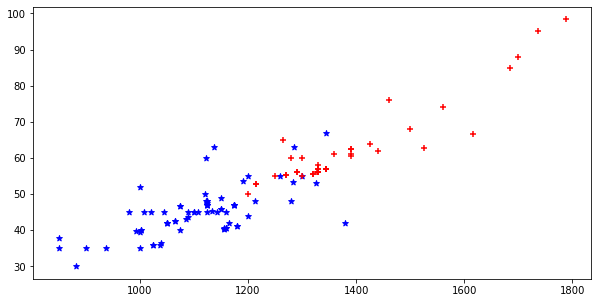

In [388]:
def plt_scatter(df,location) :
    bh2 = df[(df.location==location) & (df.bhk==2)]
    bh3 = df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (10,5)
    plt.scatter(bh2.total_sqft,bh2.price,marker='*',color='blue')
    plt.scatter(bh3.total_sqft,bh3.price,marker='+',color='red')
    print(bh3.head())
    
plt_scatter(df11,'Uttarahalli')

In [149]:
df10 = df9.copy()
df10.head(2)

,location,total_sqft,bath,price,bhk,cost_per_sqft
210,1st Block Jayanagar,2850.0,4.0,428.0,4,15018
848,1st Block Jayanagar,1630.0,3.0,194.0,3,11902


In [179]:
def remove_outliers(df) :
    x = np.array([])
    for i,j in df.groupby('location') :
        bhk_stats = {}
        for bhk,bhk_df in j.groupby('bhk') :
            bhk_stats[bhk] = {
                'mean' : np.mean(bhk_df['cost_per_sqft']),
                'count' : bhk_df.shape[0]
            }
        for bhk,bhk_df in j.groupby('bhk') :
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count'] > 5 :
                x = np.append(x,bhk_df[bhk_df.cost_per_sqft<(stats['mean'])].index.values)
    return df.drop(x,axis='index')
df11 = remove_outliers(df10)

In [191]:
len(df11)

7378

In [198]:
df11.head()
print(df11.bath.unique())
df11[df11.total_sqft/df11.bhk > 500]

[ 4.  3.  2.  5.  8.  1.  6. 14.  7.  9. 12. 16. 13.]


,location,total_sqft,bath,price,bhk,cost_per_sqft
210,1st Block Jayanagar,2850.0,4.0,428.0,4,15018
848,1st Block Jayanagar,1630.0,3.0,194.0,3,11902
2152,1st Block Jayanagar,1875.0,2.0,235.0,3,12533
7358,1st Block Jayanagar,1235.0,2.0,148.0,2,11984
7383,1st Block Jayanagar,2750.0,4.0,413.0,4,15018
...,...,...,...,...,...,...
13238,other,1200.0,2.0,70.0,2,5833
13245,other,1800.0,1.0,200.0,1,11111
13285,other,1353.0,2.0,110.0,2,8130
13291,other,812.0,1.0,26.0,1,3202


(array([4.816e+03, 1.758e+03, 6.810e+02, 8.000e+01, 3.000e+01, 7.000e+00,
        0.000e+00, 3.000e+00, 2.000e+00, 1.000e+00]),
 array([ 1. ,  2.5,  4. ,  5.5,  7. ,  8.5, 10. , 11.5, 13. , 14.5, 16. ]),
 <a list of 10 Patch objects>)

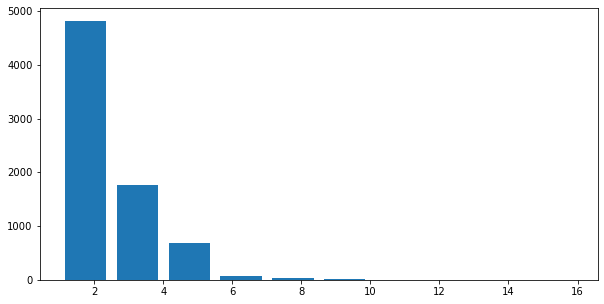

In [244]:
plt.hist(df11.bath,rwidth=0.8)

In [208]:
df12 = df11[~(df11.bath>(df11.bhk+1))]
#bathrooms cleaned

In [209]:
df12.shape

(7300, 6)

In [229]:
df12.groupby('bhk').agg('count')

,location,total_sqft,bath,price,cost_per_sqft
bhk,,,,,
1,516,516,516,516,516
2,3685,3685,3685,3685,3685
3,2453,2453,2453,2453,2453
4,502,502,502,502,502
5,69,69,69,69,69
6,41,41,41,41,41
7,10,10,10,10,10
8,14,14,14,14,14
9,5,5,5,5,5


In [230]:
df12[df12.bhk>10]

,location,total_sqft,bath,price,bhk,cost_per_sqft
459,other,5000.0,9.0,360.0,11,7200
3609,other,10000.0,16.0,550.0,16,5500
7979,other,6000.0,12.0,150.0,11,2500
9935,other,5425.0,13.0,275.0,13,5069


In [231]:
df12.shape

(7300, 6)

In [232]:
df12.head()

,location,total_sqft,bath,price,bhk,cost_per_sqft
210,1st Block Jayanagar,2850.0,4.0,428.0,4,15018
848,1st Block Jayanagar,1630.0,3.0,194.0,3,11902
2152,1st Block Jayanagar,1875.0,2.0,235.0,3,12533
7138,1st Block Jayanagar,1200.0,2.0,130.0,3,10833
7358,1st Block Jayanagar,1235.0,2.0,148.0,2,11984


In [236]:
df12.groupby('location')['location'].agg('count')

location
1st Block Jayanagar             7
1st Block Koramangala           6
1st Phase JP Nagar             16
2nd Phase Judicial Layout       8
2nd Stage Nagarbhavi            4
                             ... 
Yelahanka                      86
Yelahanka New Town             24
Yelenahalli                     8
Yeshwanthpur                   38
other                        1090
Name: location, Length: 255, dtype: int64

In [245]:
final = df12.copy()

In [246]:
final.shape

(7300, 6)

In [247]:
final.head()

,location,total_sqft,bath,price,bhk,cost_per_sqft
210,1st Block Jayanagar,2850.0,4.0,428.0,4,15018
848,1st Block Jayanagar,1630.0,3.0,194.0,3,11902
2152,1st Block Jayanagar,1875.0,2.0,235.0,3,12533
7138,1st Block Jayanagar,1200.0,2.0,130.0,3,10833
7358,1st Block Jayanagar,1235.0,2.0,148.0,2,11984


In [248]:
final.groupby('location').agg('count')

,total_sqft,bath,price,bhk,cost_per_sqft
location,,,,,
1st Block Jayanagar,7,7,7,7,7
1st Block Koramangala,6,6,6,6,6
1st Phase JP Nagar,16,16,16,16,16
2nd Phase Judicial Layout,8,8,8,8,8
2nd Stage Nagarbhavi,4,4,4,4,4
...,...,...,...,...,...
Yelahanka,86,86,86,86,86
Yelahanka New Town,24,24,24,24,24
Yelenahalli,8,8,8,8,8


In [249]:
dummies = pd.get_dummies(final.location)

In [250]:
dummies.head()

,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
210,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
848,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2152,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7138,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7358,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [262]:
final1 = pd.concat([final,dummies],axis='columns')

In [263]:
final1 = final1.drop(['location','other','cost_per_sqft'],axis='columns')

In [264]:
final1.head()

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
210,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
848,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2152,1875.0,2.0,235.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7138,1200.0,2.0,130.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7358,1235.0,2.0,148.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [289]:
x = final1.drop(['price'],axis='columns')

In [290]:
x.head()

,total_sqft,bath,bhk,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
210,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
848,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2152,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7138,1200.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7358,1235.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [291]:
y = final1.price

In [292]:
y.head()

210     428.0
848     194.0
2152    235.0
7138    130.0
7358    148.0
Name: price, dtype: float64

In [327]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVC

In [332]:
def find_best_model(x,y) :
    algos = {
        'linear_regression' : {
            'model' : LinearRegression() ,
            'params' : {
                'normalize' : [True,False]
            }
        },
        'decision_tree' : {
            'model' : DecisionTreeRegressor() ,
            'params' : {
                'splitter' : ['best','random']
            }
        }
    }
    scores=[]
    cv = ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
    for algorithm,value in algos.items() :
        gs = GridSearchCV(value['model'],value['params'],cv=cv,return_train_score=False)
        gs.fit(x,y)
        scores.append({
            'model' : algorithm ,
            'best_score' : gs.best_score_ ,
            'best_params' : gs.best_params_
        })
    return pd.DataFrame(scores,columns=['model','best_score','best_params'])
find_best_model(x,y)

,model,best_score,best_params
0,linear_regression,0.793971,{'normalize': False}
1,decision_tree,0.662954,{'splitter': 'random'}


In [335]:
#concluded LinearRegression is the best

In [336]:
lr = LinearRegression(normalize=False)
lr.fit(x,y)

LinearRegression()

In [353]:
def predict_price(location,sqft,bath,bhk) :
    z = np.zeros(len(x.columns))
    __loc = np.where(x.columns==location)
    z[0] = sqft
    z[1] = bath
    z[2] = bhk
    if __loc :
        z[__loc] = 1
    return lr.predict([z])[0]

In [386]:
predict_price('1st Block Koramangala',8000,5,5)

681.2086209441458

In [393]:
lr.score(x,y)

0.861244825182646

In [395]:
lr.score(x_train,y_train)

0.8592067745167784

In [397]:
import pickle
with open('bangalore_model.pickle','wb') as f :
    pickle.dump(lr,f)

In [399]:
import json
columns = { 
    'data_columns' : [col.lower() for col in x.columns]
}
with open('columns.json','w') as f :
    f.write(json.dumps(columns))